### MALE FEMALE BIASES CALCULATION


In [1]:
import sys 
sys.path.append('..')

import json
import glob
import traceback
from gensim.models import KeyedVectors
from calculate_distance import CalculateDistance
from calculate_bias import calculate_bias_for_all_embedding
from utils import populate_b2e_dict_for_words
from plot_utils import get_association_subplot, get_bias_plot, get_correlation_heatmap

#CHANGE BELOW TWO LINE WITH
from word_sets_stanford_standards import MALE_WORDS_KOREAN as MALE_WORDS, FEMALE_WORDS_KOREAN as FEMALE_WORDS, PROFESSIONAL_OCCUPATION_KOREAN as PROFESSIONAL_OCCUPATIONS, PROFESSIONAL_OCCUPATIONS_ENGLISH
MODEL_DIR = '../../word_embeddings/korean_embeddings/'

### load male, female & professional occupation wordlist

In [2]:
target_groups = [PROFESSIONAL_OCCUPATIONS]
target_group_labels = ['professional_occupation']

reference_groups = [MALE_WORDS, FEMALE_WORDS]
reference_group_labels = ['male', 'female']

print('target group -->')
for group, labels in zip(target_groups, target_group_labels):
    print(labels, group)

print('reference group -->')
for group, labels in zip(reference_groups, reference_group_labels):
    print(labels, group)



b2e_dict = populate_b2e_dict_for_words(PROFESSIONAL_OCCUPATIONS, PROFESSIONAL_OCCUPATIONS_ENGLISH)

target group -->
professional_occupation ['관리인', '통계 학자', '조산사', '보증인', '경매 자', '사진사', '지질 학자', '슈 메이커', '선수', '출납원', '댄서', '가계부', '회계사', '물리학 자', '정원사', '치과 의사', '위버', '대장장이', '심리학자', '감독관', '수학자', '측량사', '재단사', '디자이너', '경제학자', '기계공', '노동자', '포스트 마스터', '브로커', '화학자', '사서', '담당자', '임원 ', '음악가 ', '포터 ', '과학자 ', '목수 ', '선원 ', '강사 ', '셰리프 ', '파일럿 ', '검사관 ', '메이슨 ', '베이커', '관리자', '건축가', '수집가', '운영자', '외과 의사', '드라이버', '페인터', '도체', '간호사', '쿡', '엔지니어', '퇴직', '판매', '변호사', '성직자', '의사', '농부', '서기', '관리자', '가드', '아티스트', '스미스', '공식', '경찰 ', '박사님', '교수', '학생', '심사', '교사', '저자', '비서', '군인']
reference group -->
male ['그', '아들', '자신의', '힘', '아버지', '남자', '소년', '자신', '남성', '형제', '아들', '아버지', ' 남자 ', '남자 ', '남성 ', '형제 ', '삼촌 ', '삼촌', '조카', '조카']
female ['그녀', '딸', '그녀', '그녀', '어머니', '여자', '소녀', '자신', '여성', '자매', '딸', '어머니', ' 여자들', '여아', '여성', '자매', '이모', '이모', 'niece', 'nieces']


In [3]:
calculate_association_distance = CalculateDistance()
calculate_association_distance.set_target_word_groups(target_word_groups=target_groups, target_group_labels=target_group_labels)
calculate_association_distance.set_reference_word_groups(reference_word_groups=reference_groups, reference_group_labels=reference_group_labels)

### Calculate associations

['../../word_embeddings/korean_embeddings/model.bin', '../../word_embeddings/korean_embeddings/cc.ko.300.vec']
word  남자  not in embedding 
word 남자  not in embedding 
word 남성  not in embedding 
word 형제  not in embedding 
word 삼촌  not in embedding 
word 통계 학자 not in embedding 
word 경매 자 not in embedding 
word 지질 학자 not in embedding 
word 슈 메이커 not in embedding 
word 출납원 not in embedding 
word 물리학 자 not in embedding 
word 치과 의사 not in embedding 
word 포스트 마스터 not in embedding 
word 임원  not in embedding 
word 음악가  not in embedding 
word 포터  not in embedding 
word 과학자  not in embedding 
word 목수  not in embedding 
word 선원  not in embedding 
word 강사  not in embedding 
word 셰리프  not in embedding 
word 파일럿  not in embedding 
word 검사관  not in embedding 
word 메이슨  not in embedding 
word 외과 의사 not in embedding 
word 경찰  not in embedding 
word  여자들 not in embedding 
word nieces not in embedding 
word 통계 학자 not in embedding 
word 경매 자 not in embedding 
word 지질 학자 not in embedding 
word 슈 메이커 not in e

Traceback (most recent call last):
  File "../calculate_distance.py", line 31, in __get_group_centroid
    word_vector = model.get_vector(word)
  File "/root/miniconda3/envs/ner/lib/python3.6/site-packages/gensim/models/keyedvectors.py", line 471, in get_vector
    return self.word_vec(word)
  File "/root/miniconda3/envs/ner/lib/python3.6/site-packages/gensim/models/keyedvectors.py", line 468, in word_vec
    raise KeyError("word '%s' not in vocabulary" % word)
KeyError: "word ' 남자 ' not in vocabulary"
Traceback (most recent call last):
  File "../calculate_distance.py", line 31, in __get_group_centroid
    word_vector = model.get_vector(word)
  File "/root/miniconda3/envs/ner/lib/python3.6/site-packages/gensim/models/keyedvectors.py", line 471, in get_vector
    return self.word_vec(word)
  File "/root/miniconda3/envs/ner/lib/python3.6/site-packages/gensim/models/keyedvectors.py", line 468, in word_vec
    raise KeyError("word '%s' not in vocabulary" % word)
KeyError: "word '남자 ' not 

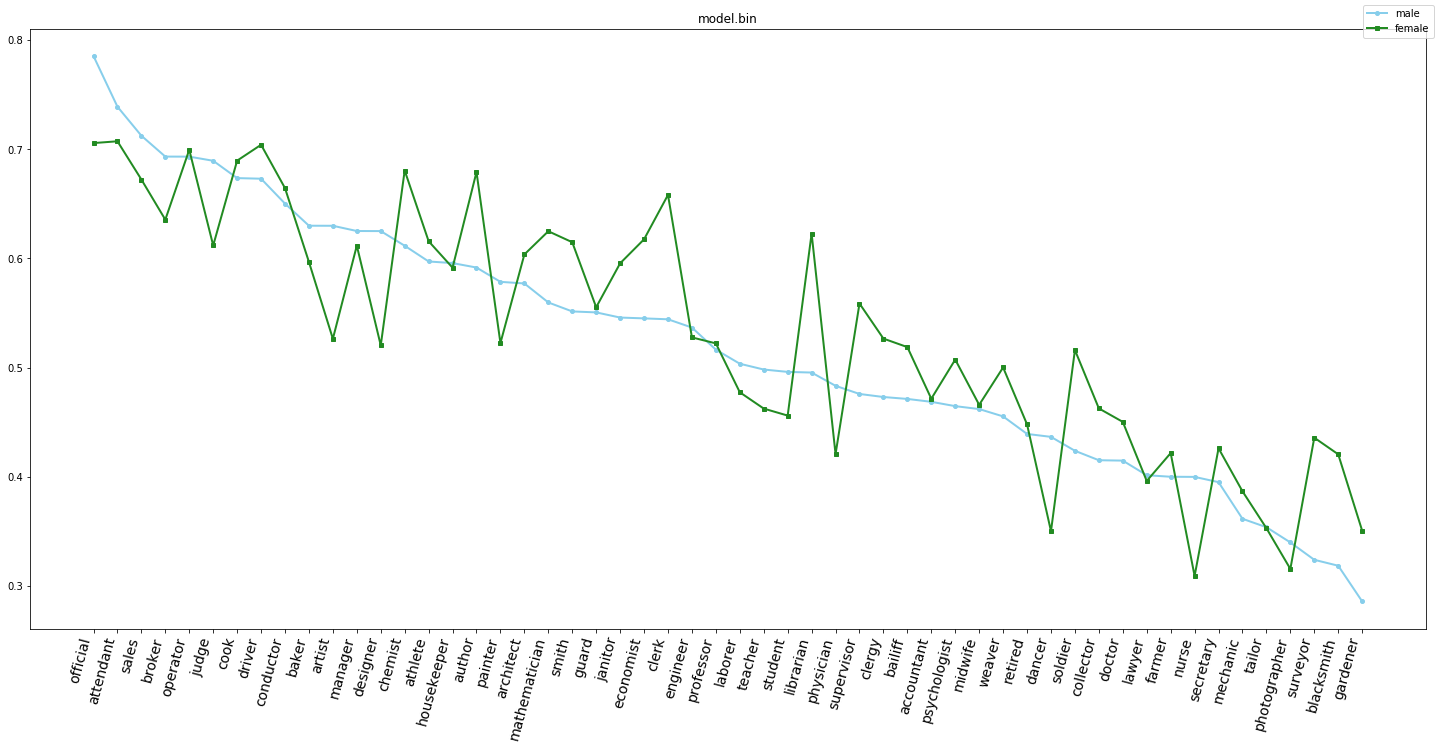

In [4]:
association_dict = {}
model_dir = MODEL_DIR
filenames = glob.glob(model_dir + '*')
print(filenames)
for filename in filenames:
    try:
        embedding_name = filename.split('/')[-1]
        target_wise_association_for_this_paper = {}
        if embedding_name.split('.')[-1] == 'bin':
            model = KeyedVectors.load_word2vec_format(filename, binary=True)
        else:
            model = KeyedVectors.load_word2vec_format(filename, binary=False)
        target_wise_association_for_this_embedding = calculate_association_distance.get_association_for_provided_embedding(model=model)
        association_dict[embedding_name] = target_wise_association_for_this_embedding
        

        get_association_subplot(target_wise_association_for_this_paper=target_wise_association_for_this_embedding, b2e_dict = b2e_dict, title= embedding_name)
    except:
        pass


## Calculate bias

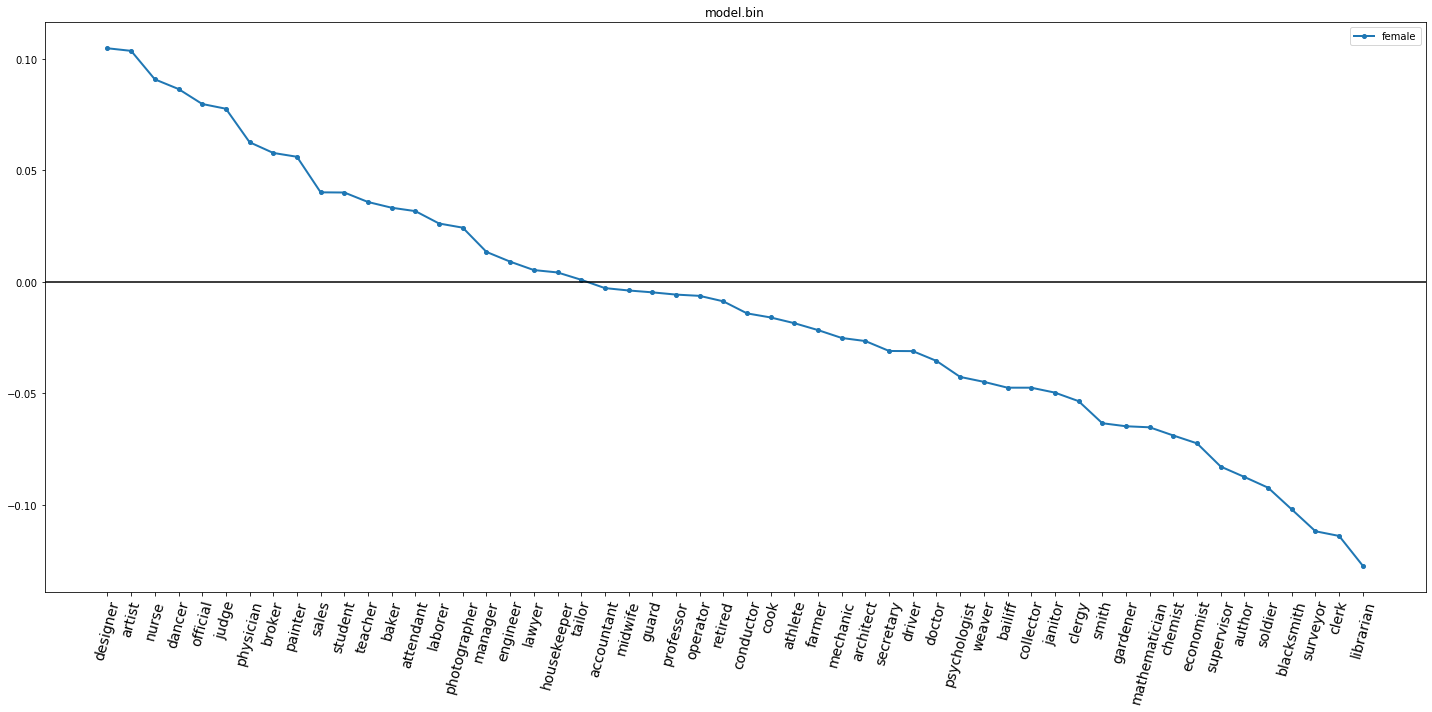

In [5]:
from plot_utils import get_bias_plot
female_bias_dict_for_all_embeddings = calculate_bias_for_all_embedding(association_dict=association_dict, 
                                                                     target_label = target_group_labels[0], 
                                                                     reference_labels = reference_group_labels)

get_bias_plot(bias_dict=female_bias_dict_for_all_embeddings, b2e_dict=b2e_dict, bias_label = reference_group_labels[1])

## Correlation Heatmap

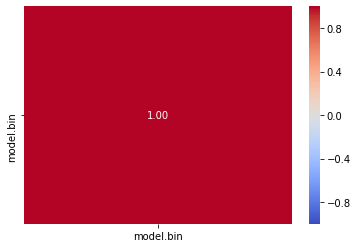

In [6]:
import pandas as pd
df = pd.DataFrame.from_dict(female_bias_dict_for_all_embeddings)
get_correlation_heatmap(df=df)